In [1]:
###########################################3
%matplotlib inline
import sys
sys.path.append("../")
###########################################3

import pandas as pd
import sqlite3
from volsetup.logger import logger
from volsetup import config
import operations.market_data as ddtt
import os
globalconf = config.GlobalConfig()
log = logger("ipython")
import numpy as np
from matplotlib.pyplot import *
import analytics.dq_report as adr
report_dict_ib = {
    "symbols":['SPY'],
    "expiries":['2017-03'],
    "db_type":"optchain_ib",
    "variables":[ 'modelTheta', 'modelDelta', 'modelOptPrice', 'Volume', 'modelImpliedVol',
                  'modelUndPrice','modelVega','lastUndPrice', 'modelGamma', 'lastImpliedVol' ],
    'current_datetime':'current_datetime',
    'symbol':'symbol',
    'right':'right',
    'strike':'strike',
    'expiry':'expiry',
    'format_index':"%Y%m%d%H%M%S",
    'valid_rights': ['P', 'C'],
    'filtro_sqlite': "substr(current_datetime,1,8)",
    'formato_hoy':'%Y%m%d'

}


report_dict_yhoo = {
    "symbols":['SPY'],
    "expiries":['2017-03'],
    "db_type":"optchain_yhoo",
    "variables":[
        'IV','Last','Vol','Open_Int','Bid','Ask'],
    'current_datetime':'Quote_Time',
    'symbol':'Symbol',
    'right':'Type',
    'strike':'Strike',
    'expiry':'Expiry_txt',
    'format_index':"%Y-%m-%d %H:%M:%S",
    'valid_rights':['put','call'],
    'filtro_sqlite': "substr(Quote_time,1,10)",
    'formato_hoy':'%Y-%m-%d'

}



In [2]:
dict1 = adr.read_opt_chain_data(globalconf,"20170318",10,report_dict_ib)
#dict2 = adr.read_opt_chain_data(globalconf,"20170217",3,report_dict_yhoo)




2017-06-21 06:54:17,600 - dq_report - INFO - ('final_list = ', ['optchain_ib_expiry_2017-03.db'])
2017-06-21 06:54:17,610 - dq_report - INFO - repo = optchain_ib_expiry_2017-03.db
2017-06-21 06:54:17,629 - dq_report - INFO - symbol = SPY
2017-06-21 06:54:18,369 - dq_report - INFO - len(df1) = 6216 


In [3]:
dict1.keys()



dict_keys(['modelTheta_SPY_P_ib_expiry_2017-03', 'modelDelta_SPY_P_ib_expiry_2017-03', 'modelOptPrice_SPY_P_ib_expiry_2017-03', 'Volume_SPY_P_ib_expiry_2017-03', 'modelImpliedVol_SPY_P_ib_expiry_2017-03', 'modelUndPrice_SPY_P_ib_expiry_2017-03', 'modelVega_SPY_P_ib_expiry_2017-03', 'lastUndPrice_SPY_P_ib_expiry_2017-03', 'modelGamma_SPY_P_ib_expiry_2017-03', 'lastImpliedVol_SPY_P_ib_expiry_2017-03', 'modelTheta_SPY_C_ib_expiry_2017-03', 'modelDelta_SPY_C_ib_expiry_2017-03', 'modelOptPrice_SPY_C_ib_expiry_2017-03', 'Volume_SPY_C_ib_expiry_2017-03', 'modelImpliedVol_SPY_C_ib_expiry_2017-03', 'modelUndPrice_SPY_C_ib_expiry_2017-03', 'modelVega_SPY_C_ib_expiry_2017-03', 'lastUndPrice_SPY_C_ib_expiry_2017-03', 'modelGamma_SPY_C_ib_expiry_2017-03', 'lastImpliedVol_SPY_C_ib_expiry_2017-03'])

In [4]:
df3=dict1['modelOptPrice_SPY_P_ib_expiry_2017-03']
df4=dict1['modelOptPrice_SPY_C_ib_expiry_2017-03']
df5=dict1['lastUndPrice_SPY_C_ib_expiry_2017-03']

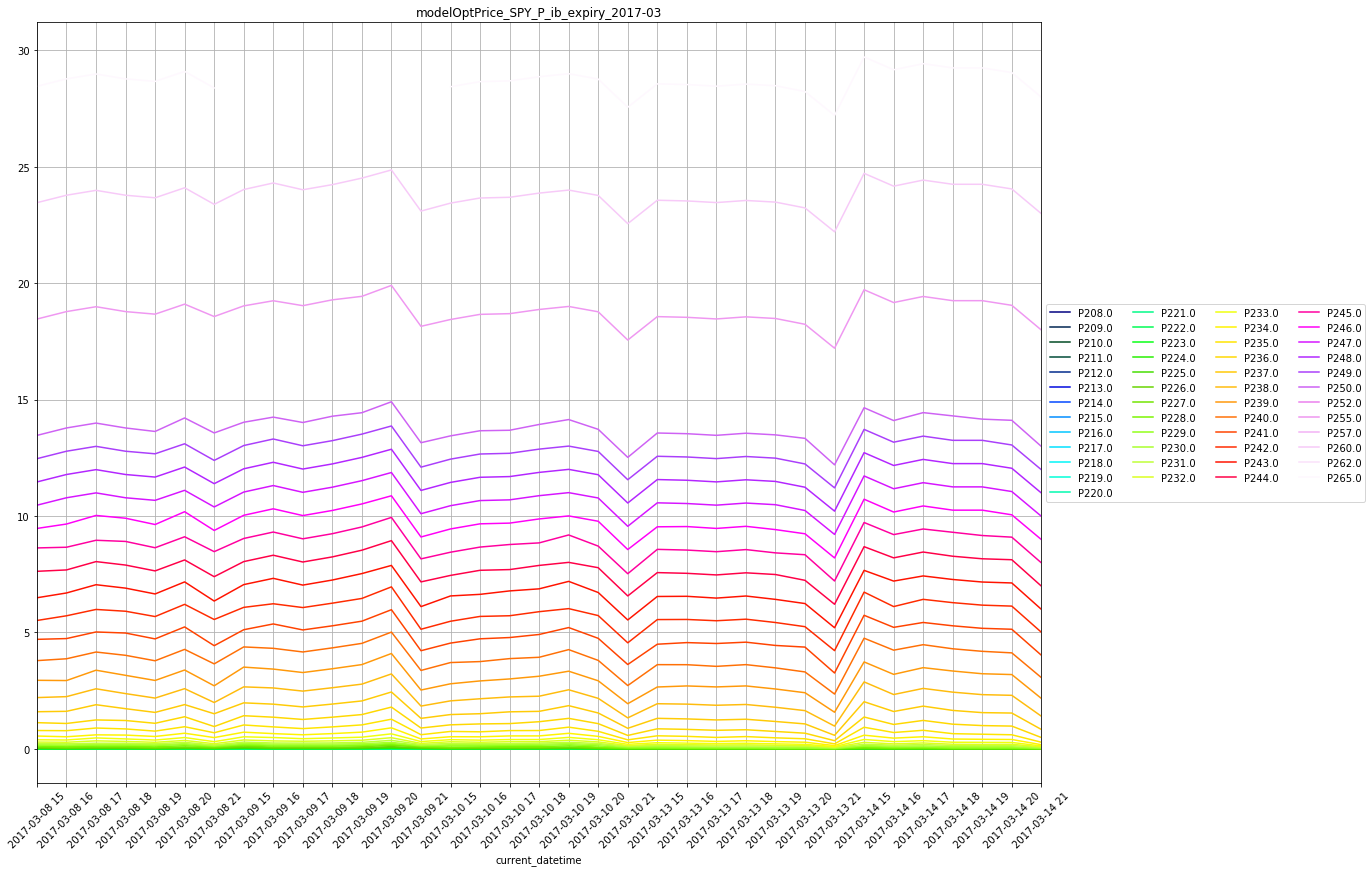

In [5]:
fig, ax = subplots()
xticks = df3.index
ax.set_xticklabels([x.strftime('%Y-%m-%d %H') for x in xticks])
ax.set_xticks(np.arange(len(df3)), minor=False)

t_plot = df3.plot(x=df3.index.to_series().dt.strftime('%Y-%m-%d %H'),
                  figsize=(18, 14),
                  ax=ax,
                  grid=True,
                  # https://matplotlib.org/examples/color/colormaps_reference.html
                  colormap='gist_ncar',
                  # xticks=xticks.to_pydatetime(),
                  # xticks=[x for x in df3.index.to_series().dt.strftime('%Y-%m-%d %H')],
                  rot=45,
                  title="modelOptPrice_SPY_P_ib_expiry_2017-03").legend(ncol=4, loc='center left',
                                            bbox_to_anchor=(1, 0.5))




In [27]:
precio_suby_ult_dia = df5[-1:].mean(axis=1).values[0]
df3.columns, df4.columns
precio_suby_ult_dia

237.01000000000019